In [73]:
#get input data
import pandas as pd
import random
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris = load_iris()

input = iris['data']
df = pd.DataFrame(input,columns = ['s_length','s_width','p_length','p_width'])
display(df)

,s_length,s_width,p_length,p_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


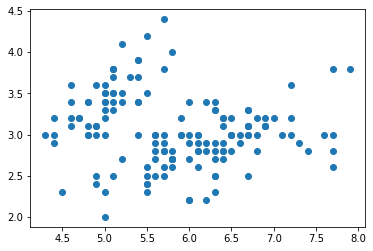

In [74]:
#draw original data plot
plt.scatter(df['s_length'],df['s_width']);
plt.show()

In [75]:
#define random point method
def r_coor(s_l_min, s_l_max, s_w_min, s_w_max,p_l_max,p_l_min,p_w_max,p_w_min):
    x = random.uniform(s_l_min,s_l_max);
    y = random.uniform(s_w_min,s_w_max);
    z = random.uniform(p_l_min,p_l_max);
    alpha = random.uniform(p_w_min,p_w_max);
    return [x,y,z,alpha];
s_l_max = max(df['s_length']);
s_l_min = min(df['s_length']);
s_w_max = max(df['s_width']);
s_w_min = min(df['s_width']);
p_l_max = max(df['p_length']);
p_l_min = min(df['p_length']);
p_w_max = max(df['p_width']);
p_w_min = min(df['p_width']);

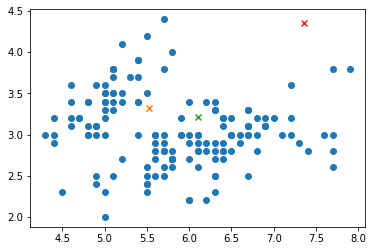

[[5.529943999264328, 3.3240001016570666, 2.8716222992244553, 1.0944439011083995], [6.1082444801046245, 3.2154995892122757, 4.019485975425702, 1.8588484587250151], [7.360084401988399, 4.354785181389522, 4.9815370245843145, 1.8236201058946797]]


In [76]:
#put k random spot on the plot
plt.scatter(df['s_length'],df['s_width']);
centroids_set = [];
k = 3;
for i in range(k):
    centroids_set.append(r_coor(s_l_min, s_l_max, s_w_min, s_w_max,p_l_max,p_l_min,p_w_max,p_w_min));
for point in centroids_set:
    plt.scatter(point[0],point[1],marker='x');
plt.show()
print(centroids_set);

In [77]:
#initialize the species column
df['species'] = -1;

In [78]:
while(True):
# calcualte the distance for each point
    count = 0;
    for list in centroids_set:
        df[count] = (((df['s_length']-list[0])**2) + ((df['s_width']-list[1])**2) + ((df['p_length']-list[2])**2) + ((df['p_width']-list[3])**2))**0.5;
        count+=1;
    #display(df)
    last_species_copy = df['species'].copy()
    #pick the closest centroid as the spicies cluster
    df['species'] = df.iloc[:,[i for i in range(5,k+5)]].idxmin(axis = 1)
    #display(df)

    df_mean = df.groupby(['species']).mean();
    #display(df_mean)
    #try to renew the centroid, if one centroid does not have any data belons to,
    #generate a new set of random centroid
    i = 0
    try:
        for point in centroids_set:
            point[0] = df_mean.loc[i]["s_length"];
            point[1] = df_mean.loc[i]["s_width"];
            point[2] = df_mean.loc[i]["p_length"];
            point[3] = df_mean.loc[i]["p_width"];
            i += 1;
    except:
        print("One or more random points may not have approperaite species, a set of new random point is generating...")
        print("if responding time is too long, you may want to decrease the k number")
        centroids_set = [];
        for i in range(k):
            centroids_set.append(r_coor(s_l_min, s_l_max, s_w_min, s_w_max, p_l_max, p_l_min, p_w_max, p_w_min));
        print("a new set of random centroids has been generated")
    else:
        print("Centroids renewed, data has been assigned to k species...")
    #print(centroids_set);
    new_species_copy = df['species'].copy()
    #display(new_species_copy)
    if new_species_copy.equals(last_species_copy):
        print("species values doesn't change, cluster complete!")
        break;

Centroids renewed, data has been assigned to k species...
Centroids renewed, data has been assigned to k species...
Centroids renewed, data has been assigned to k species...
Centroids renewed, data has been assigned to k species...
Centroids renewed, data has been assigned to k species...
species values doesn't change, cluster complete!


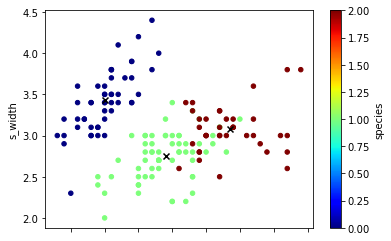

In [79]:
df.plot.scatter('s_length', 's_width', c='species', colormap='jet')
for point in centroids_set:
    plt.scatter(point[0],point[1],marker='x',color = 'black');

In [80]:
display(df)

,s_length,s_width,p_length,p_width,species,0,1,2
0,5.1,3.5,1.4,0.2,0,0.141351,3.419251,5.059542
1,4.9,3.0,1.4,0.2,0,0.447638,3.398574,5.114943
2,4.7,3.2,1.3,0.2,0,0.417109,3.569357,5.279355
3,4.6,3.1,1.5,0.2,0,0.525338,3.422410,5.153590
4,5.0,3.6,1.4,0.2,0,0.188627,3.467264,5.104334
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,4.609163,1.449577,0.611739
146,6.3,2.5,5.0,1.9,1,4.217675,0.897479,1.100724
147,6.5,3.0,5.2,2.0,2,4.411845,1.179933,0.653342
148,6.2,3.4,5.4,2.3,2,4.599259,1.508893,0.835724


In [81]:
#calculate the WSS
df.groupby(['species']).sum()

,s_length,s_width,p_length,p_width,0,1,2
species,,,,,,,
0,250.3,171.4,73.1,12.3,24.085262,169.798765,252.132126
1,365.9,170.4,272.4,88.9,211.124767,45.765447,115.806874
2,260.3,116.8,218.2,78.7,191.753749,70.985857,27.353865
